# 01 Qubits and Bloch Spheres

In [117]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np
from typing import List

## Qubit Representations

A qubit is the fundamental unit of quantum information, analogous to the classical bit. Commonly, it is described as a “superposition of both 1 and 0”, but what does this mean mathematically?

Like a lot of things in quantum mechanics, we represent a qubit as a linear combination of two basis states:
$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle \tag{1}
$$
where $\alpha$ and $\beta$ are complex numbers such that:
$$
|\alpha|^2 + |\beta|^2 = 1 \tag{2}
$$
Note, $|\alpha|^2$ is the probability of measuring the qubit in the $|0\rangle$ state and $|\beta|^2$ is the probability of measuring the qubit in the $|1\rangle$ state.

We also can write our qubit in terms of a column vector:
$$
|\psi\rangle =
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix} \tag{3}
$$
Writing qubits in column vectors also allows for us to define our basis $|0\rangle$ and $|1\rangle$ as:
$$
|0\rangle =
\begin{bmatrix}
1 \\
0
\end{bmatrix} \tag{4}
$$
and
$$
|1\rangle =
\begin{bmatrix}
0 \\
1
\end{bmatrix} \tag{5}
$$

We can visualize any qubit state on the Bloch sphere, a geometrical representation of pure qubit states. On this sphere:
- The state $|0\rangle$ is along the $+z$ axis
- The state $|1\rangle$ is along the $-z$ axis

Even though the basis $|0\rangle$ and $|1\rangle$ appear as antiparallel on the Bloch sphere, it should be obvious by equations 4 and 5, that these basis are orthogonal with each other.

The following cells will allow you to visualize qubits on a Bloch sphere for any $\alpha$ and $\beta$. A Bloch vector for a qubit is defined as:
$$
\begin{bmatrix}
x \\
y \\
z
\end{bmatrix} =
\begin{bmatrix}
2\text{Re}(\alpha^{*}\beta) \\
2\text{Im}(\alpha^{*}\beta) \\
|\alpha|^2 - |\beta|^2
\end{bmatrix} \tag{6}
$$

The only thing you need to change in the following code are the parameters in `params`.

*Note: in Python, use $j$ as the imagery unit ($j=\sqrt{-1}$).*

In [114]:
params = {
    'alpha': 1/np.sqrt(2),
    'beta': 1/np.sqrt(2),
}

In [115]:
def generate_bloch_vector(psi: Statevector) -> List[float]:
    alpha, beta = psi.data

    prob_a = np.real(np.conj(alpha) * alpha)
    prob_b = np.real(np.conj(beta) * beta)
    if np.abs((prob_a + prob_b - 1)) > 1e-10:
        raise ValueError("Wavefunction is not normalized.")

    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2

    bloch_vector = [x, y, z]
    return bloch_vector

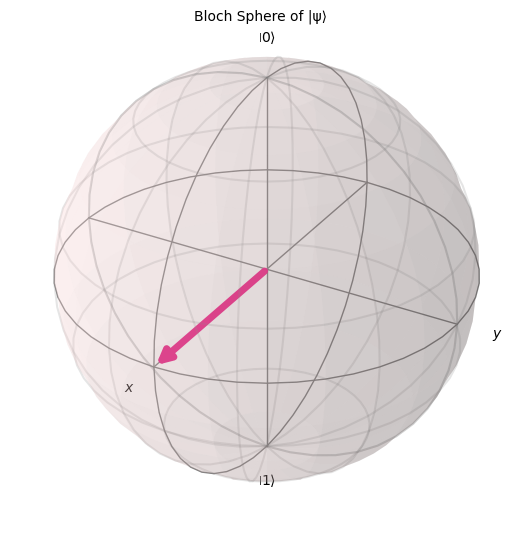

In [116]:
psi = Statevector([params['alpha'], params['beta']])
bloch_vector = generate_bloch_vector(psi=psi)

plot_bloch_vector(bloch_vector, title="Bloch Sphere of |ψ⟩")

## Qubit Operations

Like any 3D vector, we can apply rotational operations. If we assume the unit vector $\hat{n} = (n_x, n_y, n_z)$, then we can rotate by $\theta$ about the $\hat{n}$ axis by:
$$
R_{\hat{n}}(\theta) = e^{-i(\theta/2)\hat{n}\cdot\sigma} = \text{cos}(\theta/2)I - i\text{sin}(\theta/2)(n_x\sigma_x+n_y\sigma_y+n_y\sigma_y) \tag{7}
$$
where:
- $I$ is the identity matrix
- $\sigma_x$, $\sigma_y$, $\sigma_z$ are the Pauli matrices

We can take equation 7 to define rotations about the $x$, $y$, and $z$ axes:
$$
R_x(\theta) = e^{-i(\theta/2)\sigma_x} =
\begin{bmatrix}
\text{cos}(\theta/2) && -i\text{sin}(\theta/2) \\
-i\text{sin}(\theta/2) && \text{cos}(\theta/2)
\end{bmatrix} \tag{8}
$$
$$
R_y(\theta) = e^{-i(\theta/2)\sigma_y} =
\begin{bmatrix}
\text{cos}(\theta/2) && -\text{sin}(\theta/2) \\
-\text{sin}(\theta/2) && \text{cos}(\theta/2)
\end{bmatrix} \tag{9}
$$
$$
R_z(\theta) = e^{-i(\theta/2)\sigma_z} =
\begin{bmatrix}
e^{-i(\theta/2)} && 0 \\
0 && e^{-i(\theta/2)}
\end{bmatrix} \tag{10}
$$

In [104]:
params = {
    'alpha': 1/np.sqrt(2),
    'beta': 1/np.sqrt(2),
    'axis': 'x',
    'angle': np.pi/2,
}

In [105]:
def rotate_qubit(psi: Statevector, axis: str, angle: float) -> QuantumCircuit:
    qc = QuantumCircuit(1)
    qc.initialize(psi, 0)

    if axis == "x":
        qc.rx(angle, 0)
    elif axis == "y":
        qc.ry(angle, 0)
    elif axis == "z":
        qc.rz(angle, 0)
    else:
        raise ValueError("Invalid axis")

    return qc

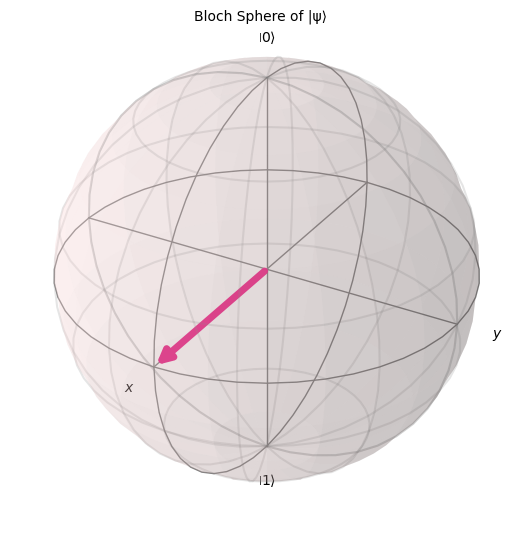

In [103]:
psi = Statevector([params['alpha'], params['beta']])
init_bloch_vector = generate_bloch_vector(psi=psi)

plot_bloch_vector(init_bloch_vector, title="Bloch Sphere of |ψ⟩")

   ┌─────────────────────────────┐┌─────────┐
q: ┤ Initialize(0.70711,0.70711) ├┤ Rx(π/2) ├
   └─────────────────────────────┘└─────────┘


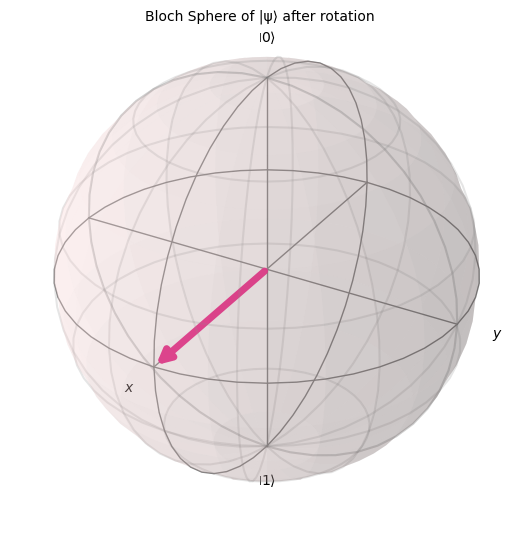

In [107]:
qc = rotate_qubit(psi=psi, axis=params['axis'], angle=params['angle'])
print(qc)
final_state = Statevector.from_instruction(qc)
final_bloch_vector = generate_bloch_vector(final_state)

plot_bloch_vector(final_bloch_vector, title="Bloch Sphere of |ψ⟩ after rotation")